# EDA Before Fitting a Regression Model

For our example analysis, we’ve downloaded a dataset from Kaggle which contains data on MLB games from the 2016 season. We’ve saved this data as a dataframe named bb. Suppose that we want to fit a linear regression to predict attendance using the following predictors: <br> <br>
**game_type** — is the game during the day or at night<br>
**day_of_week** — what day of the week did the game occur<br>
**temperature** — average game temperature (Fahrenheit)<br>
**sky** — description of sky condition at the time of the game<br>
**total_runs** — total runs scored in the game<br>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
bb = pd.read_csv('baseball_reference_2016_clean.csv')
bb = bb[['game_type','day_of_week','temperature','sky','total_runs', 'attendance']]

## Preview the dataset

In [33]:
bb.head()

,game_type,day_of_week,temperature,sky,total_runs,attendance
0,Night Game,Sunday,74.0,Sunny,7,40030.0
1,Night Game,Wednesday,55.0,Overcast,5,21621.0
2,Night Game,Wednesday,48.0,Unknown,6,12622.0
3,Night Game,Wednesday,65.0,Cloudy,4,18531.0
4,Day Game,Wednesday,77.0,In Dome,7,18572.0


After our initial inspection, we’ll want to dig deeper to investigate the following:<br>
- the data type of each variable
- how discrete/categorical data is coded (and whether we need to make any changes)
- how the data are scaled
- whether there is missing data and how it is coded
- whether there are outliers
- the distributions of continuous features
- the relationships between pairs of features

## Data types

In [34]:
bb.dtypes

game_type       object
day_of_week     object
temperature    float64
sky             object
total_runs       int64
attendance     float64
dtype: object

## Categorical encoding

Categorical variables can be ordinal

Categorical features with many levels are “expensive” to include in a regression model (we need to calculate a separate slope for each level). We may want to consider:
- deleting the records of data with only a few observation
- combining categories with few observations into larger categories of related variables 

Categorical variables can be inspected using .value_counts()

In [48]:
bb['game_type'].value_counts(dropna=False)

Night Game    1664
Day Game       799
Name: game_type, dtype: int64

In [49]:
bb['day_of_week'].value_counts(dropna=False)

Saturday     396
Friday       394
Sunday       392
Wednesday    379
Tuesday      376
Monday       278
Thursday     248
Name: day_of_week, dtype: int64

Text(0.5, 1.0, 'Attendance by Day of Week')

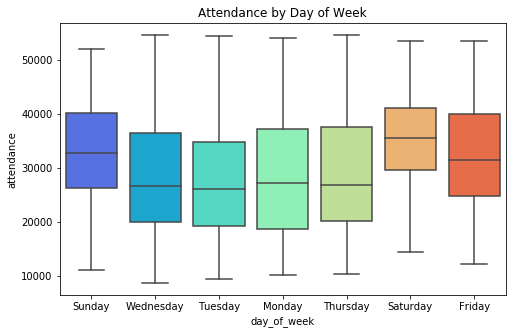

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week',y='attendance',data=bb, palette='rainbow')
plt.title("Attendance by Day of Week")

There are a few different options for how we might want to code the day_of_week variable. If attendance increases approximately linearly throughout the week, we might argue that day_of_week is ordinal and code it as an int in our model. However, attendance goes up and down throughout the week, we’re better off leaving it as an unordered category (str). Finally, if we see that games on Friday-Sunday simply have higher attendance than other days of the week, we might re-code this feature to only have two levels: Weekend and Weekday. We can check this by using boxplots:

In [37]:
bb['sky'].value_counts(dropna=False)

Cloudy      761
Sunny       745
Unknown     402
In Dome     356
Overcast    159
Drizzle      16
Rain         12
Night        12
Name: sky, dtype: int64

## Scaling

For quantitative features, it is important to think about how each feature is scaled. Some features will be on vastly different scales than others just based on the nature of what the feature is measuring.

In [41]:
bb.describe()

,temperature,total_runs,attendance
count,2463.000000,2463.000000,2460.000000
mean,73.818920,8.933415,30370.703659
std,10.583106,4.480352,9875.466703
min,31.000000,1.000000,8766.000000
25%,67.000000,6.000000,22432.000000
50%,74.000000,8.000000,30604.500000
75%,81.000000,12.000000,38396.250000
max,101.000000,29.000000,54449.000000


For example, let’s look at temperature and total_runs using the .describe() method.<br>

These two features are on different scales because what they are measuring are different (temperature is in degrees Fahrenheit, total_runs is the number of runs scored in a game). Because of this, the ranges of values and the standard deviations for each are very different from one another. We can see here that temperature has a standard deviation of about 10.57, while total_runs has a standard deviation of about 4.58.<br>

When working with features with largely differing scales, it is often a good idea to standardize the features so that they all have a mean of 0 and a standard deviation of 1.<br>

A feature without any values close to zero may also make it more difficult to estimate and interpret the intercept of a regression model. Standardizing or otherwise re-scaling the feature can fix this issue.<br><br>

## Missing data

When we initially inspected the data, we saw some evidence that missing data is coded in a few different ways. For example, temperature uses the term Unknown, sky uses both Unknown and NaN, and total_runs has - to represent a missing value. The observations with missing values will either have to be removed or replaced (with an imputed value or missing data type that Python can recognize, such as np.NaN) in order to proceed with fitting a regression model.

## Outliers

In our EDA, it is important to check for outliers and skew in the data. One way to check for outliers is to use scatter plots:

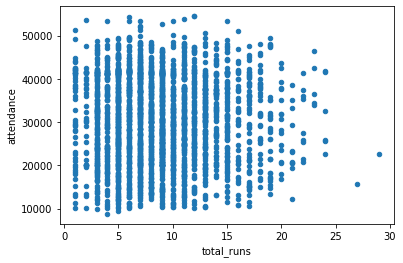

In [42]:
bb.plot.scatter(x = 'total_runs',y = 'attendance')

We can see here that there is one instance where the total runs in a single game is about 60, which is much larger than in the other games. Depending on the situation, we may first want to verify that this value is correct, then we can decide whether or not to remove it prior to fitting the model.

## Distributions and associations

Prior to fitting a linear regression model, it can be important to inspect the distributions of quantitative features and investigate the relationships between features. We can visually inspect both of these by using a pair plot:

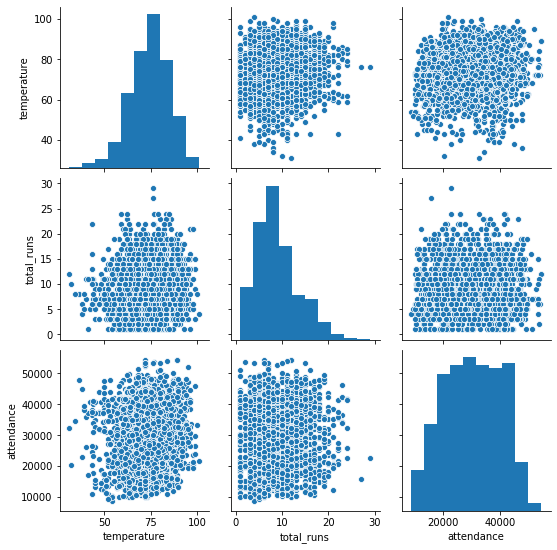

In [43]:
sns.pairplot(bb)

Looking at the histograms along the diagonal, total_runs appears to be somewhat right-skewed. This indicates that we may want to transform this feature to make it more normally distributed.<br>

We can explore the relationships between pairs of features by looking at the scatterplots off of the diagonal. This is useful for a few different reasons. For example, if we see non-linear associations between any of the predictors and the outcome variable, that might lead us to test out polynomial terms in our model. We can also get a sense for which features are most highly related to our outcome variable and check for collinearity. In this example, there appears to be a slight positive linear association between temperature and the total number of runs. We can further investigate this using a heat map of the correlation matrix:

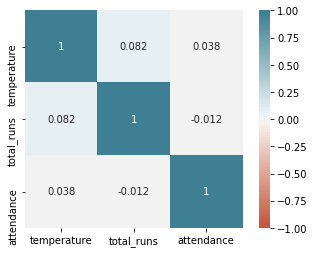

In [47]:
corr = bb.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

There is a correlation of 0.35 between temperature and the total number of runs. This is not large enough to cause concern; however, if two or more predictors are highly correlated, we may consider leaving only one in our analysis. On the other hand, features that are highly correlated with our outcome variable are especially important to include in the model.

## Conclusion

Let’s review the ways we were able to explore this data set in preparation for a regression model:

- We previewed the first few rows of the data set using the .head() method.
- We checked the data type of each variable in the data set using .dtypes and corrected variables with incorrect data types.
- We investigated our categorical data to inform categorical encoding
- We investigated the scale of our quantitative variables and considered whether standardizing/scaling might be appropriate
- We investigated missing data
- We checked for outliers
- We inspected the distributions of our quantitative variables
- We looked at the relationships between pairs of features using both scatter plots and box plots